In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
class simple_linear_regression:
    def __init__(self) -> None:
        self.m = None
        self.b = None

    def fit(self, X_train, y_train):
        # slope(m) calculation
        self.m = ((X_train - X_train.mean()) * (y_train - y_train.mean())).sum() / ((X_train - X_train.mean()) ** 2).sum()

        # y-intercept(b) calculation
        self.b = y_train.mean() - (self.m * X_train.mean())

        return self.m, self.b

    def predict(self, X_test):
        predicted_values = (self.m * X_test) + self.b
        return predicted_values

In [5]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package')

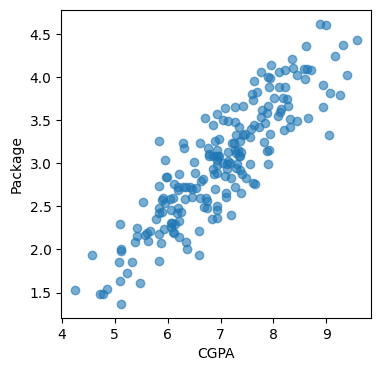

In [6]:
plt.figure(figsize = (4, 4))
plt.scatter(x = df['cgpa'], y = df['package'], alpha=0.6)
plt.xlabel('CGPA')
plt.ylabel('Package')

# Linear spread 

In [7]:
# Seperating input and output - Both should be 1D
x = df.iloc[:,0].values
# x = df.iloc[:,0:1].values - 2D array
y = df.iloc[:, -1].values

In [8]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [9]:
# Object Creation
slr = simple_linear_regression()

In [10]:
m, b = slr.fit(X_train, y_train)

Text(0, 0.5, 'Package')

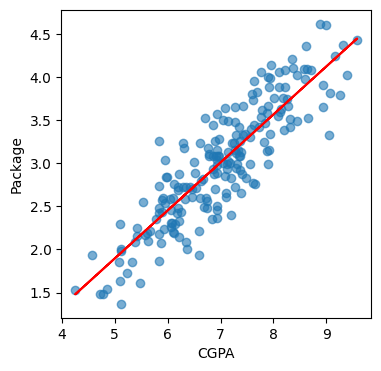

In [11]:
plt.figure(figsize = (4, 4))
plt.scatter(x = df['cgpa'], y = df['package'], alpha=0.6)
plt.plot(df['cgpa'], (m * df['cgpa']) + b, color = 'red')
plt.xlabel('CGPA')
plt.ylabel('Package')

In [12]:
y_pred = slr.predict(X_test)

### Regression Metrics

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mean_absolute_error

In [14]:
mean_absolute_error(y_test, y_pred)

0.2884710931878175

mean_squared_error

In [15]:
mean_squared_error(y_test, y_pred)

0.12129235313495527

root_mean_squared_error

In [16]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.34827051717731616

r2 Score

In [18]:
r2 = r2_score(y_test, y_pred)
r2

0.780730147510384

Adjusted r2 Score

In [20]:
1 - (((1 - r2) * (y_test.shape[0] - 1)) / (y_test.shape[0] - 1 - 1))

0.7749598882343415